[[[0.4372549  0.26666667 0.25098039]
  [0.44509804 0.2627451  0.24313725]
  [0.44117647 0.2627451  0.2372549 ]
  ...
  [0.38431373 0.18235294 0.18431373]
  [0.45294118 0.28823529 0.24705882]
  [0.39215686 0.19411765 0.17647059]]

 [[0.43333333 0.25882353 0.22352941]
  [0.44705882 0.25686275 0.20784314]
  [0.44117647 0.26078431 0.22352941]
  ...
  [0.3745098  0.18823529 0.18627451]
  [0.23921569 0.08627451 0.13921569]
  [0.17647059 0.04117647 0.1254902 ]]

 [[0.44313725 0.26078431 0.22745098]
  [0.43921569 0.23333333 0.19803922]
  [0.44313725 0.25882353 0.20392157]
  ...
  [0.20196078 0.05882353 0.1254902 ]
  [0.17254902 0.03333333 0.11960784]
  [0.1745098  0.04705882 0.12352941]]

 ...

 [[0.19411765 0.0627451  0.11568627]
  [0.18627451 0.05490196 0.12941176]
  [0.20196078 0.07647059 0.14705882]
  ...
  [0.2        0.05294118 0.12352941]
  [0.21568627 0.0745098  0.13137255]
  [0.29019608 0.1254902  0.17843137]]

 [[0.1745098  0.04705882 0.11176471]
  [0.19215686 0.06078431 0.12352941]


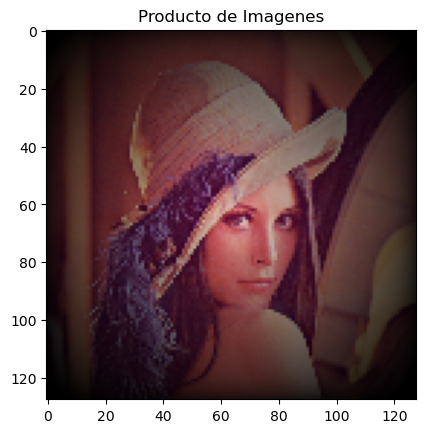

In [29]:
from tkinter import *
from tkinter import filedialog
from PIL import Image
from PIL import ImageTk
import imutils
import numpy as np
import imageio
import imageio.v2 as imageio
import matplotlib.pyplot as plt

def guardar_imagen():
    global imageOutput
    print(imageOuput)
    #array = np.reshape(imageOutput, (128, 128))
    #im = Image.fromarray(imageOuput)
    if (selected.get() == 1):
        aux="SumaClampeada"
    elif (selected.get() == 2):
        aux = "SumaPromediada"
    elif (selected.get() == 3):
        aux = "RestaClampeada"
    elif (selected.get() == 4):
        aux = "RestaPromediada"
    elif (selected.get() == 5):
        aux = "Producto"
    elif (selected.get() == 6):
          aux="Cociente"
    elif (selected.get() == 7):
          aux = "RestaFcionAbs"
    elif (selected.get() == 8):
          aux= "YIQ_SumaClampeada"
    elif (selected.get() == 9):
          aux="YIQ_SumaPromediada"
    else:
          aux="Ouput"
          
    im = Image.fromarray((imageOuput * 255).astype(np.uint8))
    im.save(f"{aux}imagenOuput.png")
    
##Funcion  de RGB A YIQ
def RGB_to_YIQ(im):
    h,w,c=im.shape # obtenemos el tamaño de la imagen original
    mYIQ = np.zeros((h,w,3)) # creamos una matriz donde generar la imagen
    mYIQ[:,:,0] = 0.299*im[:,:,0] + 0.587*im[:,:,1] + 0.114*im[:,:,2]
    mYIQ[:,:,0] = np.clip(mYIQ[:,:,0], 0, 1)
    mYIQ[:,:,1] = 0.595716*im[:,:,0] + -0.274453*im[:,:,1] + -0.321263*im[:,:,2]
    mYIQ[:,:,1] = np.clip(mYIQ[:,:,1], -0.5957, 0.5957)
    mYIQ[:,:,2] = 0.211456*im[:,:,0] + -0.522591*im[:,:,1] + 0.311135*im[:,:,2]
    mYIQ[:,:,2] = np.clip(mYIQ[:,:,2], -0.5226, 0.5226)
    return mYIQ 

def calcular_yiq_suma():
    global image1, image2,imageOuput
    h,w,c=image1.shape
    mR = np.zeros((h,w,3))
    imagev1=RGB_to_YIQ(image1)
    imagev2=RGB_to_YIQ(image2)
    if (selected.get() == 8):
        mR[:,:,0] = np.clip(mR[:,:,0], None, 1) #Suma Clampeada
        plt.title("Suma YIQ Clampeada")
    else:
        mR[:,:,0] = np.add(imagev1[:,:,0], imagev2[:,:,0])/2 #Suma Promediada
        plt.title("Suma YIQ Promediada")
    
    mR[:,:,1] = (imagev1[:,:,0]*imagev1[:,:,1] + imagev2[:,:,0]*imagev2[:,:,1])/(np.add(imagev1[:,:,0],imagev2[:,:,0]))
    mR[:,:,2] = (imagev1[:,:,0]*imagev1[:,:,2] + imagev2[:,:,0]*imagev2[:,:,2])/(np.add(imagev1[:,:,0],imagev2[:,:,0]))
    #mC = np.clip(mR/1.,0,1)
    
    plt.imshow(mR.astype('float64'))
    
    
    array = np.array(mR,dtype=np.float64)
    imageOuput = array
    image = imutils.resize(array, height=380)
    imageToShow = imutils.resize(image, width=180)
    im = Image.fromarray((imageToShow * 255).astype(np.uint8))
    #im = Image.fromarray(imageToShow)
    img = ImageTk.PhotoImage(image = im)
    lblOuputIm.configure(image=img)
    lblOuputIm.image = img
    
    pass

def calculo_cociente():
    global image1, image2,imageOuput
    h,w,c=image1.shape # obtenemos el tamaño de la imagen original
    valorMin = np.min(image2)
    print(valorMin)
    mR = np.zeros((h,w,3)) # creamos una matriz donde generar la imagen
    #mR[:,:,0] = np.divide(image1[:,:,0],image2[:,:,0])# out=np.empty_like(valorMin), where=image2[:,:,0]!=0)
    #mR[:,:,1] = np.divide(image1[:,:,1],image2[:,:,1])# out=np.empty_like(valorMin), where=image2[:,:,0]!=0)
    #mR[:,:,2] = np.divide(image1[:,:,2],image2[:,:,2])# out=np.empty_like(valorMin), where=image2[:,:,0]!=0)
    with np.errstate(divide ='ignore'):
        mR[:,:,0] = image1[:,:,0]/(image2[:,:,0])
        mR[:,:,0][mR[:,:,0] == np.inf] = valorMin
        mR[:,:,1] = image1[:,:,1]/(image2[:,:,1])
        mR[:,:,1][mR[:,:,1] == np.inf] = valorMin
        mR[:,:,2] = image1[:,:,2]/(image2[:,:,2])
        mR[:,:,2][mR[:,:,2] == np.inf] = valorMin
    mC = np.clip(mR/1.,0,1)
    print(mC)
    plt.title("Cociente de Imagenes")
    #plt.imshow(mR,vmin=0, vmax=255) # Salta con advertencia
    #plt.imshow((mR * 255).astype(np.uint8))
    plt.imshow(mC.astype('float64'))
    array = np.array(mC,dtype=np.float64)
    imageOuput = array
    image = imutils.resize(array, height=380)
    imageToShow = imutils.resize(image, width=180)
    im = Image.fromarray((imageToShow * 255).astype(np.uint8))
    #im = Image.fromarray(imageToShow)
    img = ImageTk.PhotoImage(image = im)
    lblOuputIm.configure(image=img)
    lblOuputIm.image = img
    pass 

def calculo_multiplicar():
    global image1, image2,imageOuput
    h,w,c=image1.shape # obtenemos el tamaño de la imagen original
    mR = np.zeros((h,w,3)) # creamos una matriz donde generar la imagen
    mR[:,:,0] = np.multiply(image1[:,:,0],image2[:,:,0])
    mR[:,:,1] = np.multiply(image1[:,:,1], image2[:,:,1])
    mR[:,:,2] = np.multiply(image1[:,:,2], image2[:,:,2])
    mC = np.clip(mR/1.,0,1)
    
    plt.title("Producto de Imagenes")
    #plt.imshow(mR,vmin=0, vmax=255) # Salta con advertencia
    #plt.imshow((mR * 255).astype(np.uint8))
    plt.imshow(mC.astype('float64'))
    array = np.array(mC,dtype=np.float64)
    imageOuput = array
    image = imutils.resize(array, height=380)
    imageToShow = imutils.resize(image, width=180)
    im = Image.fromarray((imageToShow * 255).astype(np.uint8))
    #im = Image.fromarray(imageToShow)
    img = ImageTk.PhotoImage(image = im)
    lblOuputIm.configure(image=img)
    lblOuputIm.image = img
    pass 

def calculo_suma():
    global image1, image2,imageOuput
    h,w,c=image1.shape # obtenemos el tamaño de la imagen original
    mR = np.zeros((h,w,3)) # creamos una matriz donde generar la imagen
    if selected.get() == 1:
        mR[:,:,0] = np.add(image1[:,:,0],image2[:,:,0])
        mR[:,:,1] = np.add(image1[:,:,1], image2[:,:,1])
        mR[:,:,2] = np.add(image1[:,:,2], image2[:,:,2])
        mC = np.clip(mR/1.,0,1)
    else:
        #Promediada
        aux1 = np.add(image1[:,:,0], image2[:,:,0])
        mR[:,:,0] = np.clip(aux1/1,aux1/2,aux1/2)
        aux2 = np.add(image1[:,:,1], image2[:,:,1])
        mR[:,:,1] = np.clip(aux2/1,aux2/2,aux2/2)
        aux3 = np.add(image1[:,:,2], image2[:,:,2])
        mR[:,:,2] = np.clip(aux3/1,aux3/2,aux3/2)
        mC = np.clip(mR/1.,0,1)
    plt.title("Suma de Imagenes")
    #plt.imshow(mR,vmin=0, vmax=255) # Salta con advertencia
    #plt.imshow((mR * 255).astype(np.uint8))
    plt.imshow(mC.astype('float64'))
    array = np.array(mC,dtype=np.float64)
    imageOuput = array
    image = imutils.resize(array, height=380)
    imageToShow = imutils.resize(image, width=180)
    im = Image.fromarray((imageToShow * 255).astype(np.uint8))#
    #im = Image.fromarray(imageToShow)
    img = ImageTk.PhotoImage(image = im)
    lblOuputIm.configure(image=img)
    lblOuputIm.image = img
    pass  

def calculo_resta():
    global image1, image2,imageOuput
    #print("- Dimensiones de la imagen:")
    #print(image1.shape, image1.dtype)
    #plt.imshow(image1T)
    h,w,c=image1.shape # obtenemos el tamaño de la imagen original
    mR = np.zeros((h,w,3)) # creamos una matriz donde generar la imagen
    if selected.get() == 3:
        mR[:,:,0] = np.subtract(image1[:,:,0],image2[:,:,0])
        mR[:,:,1] = np.subtract(image1[:,:,1], image2[:,:,1])
        mR[:,:,2] = np.subtract(image1[:,:,2], image2[:,:,2])
        mC = np.clip(mR/1.,0,1)
    elif selected.get() == 4:
        #Promediada
        aux1 = np.subtract(image1[:,:,0], image2[:,:,0])
        mR[:,:,0] = np.clip(aux1/1,aux1/2,aux1/2)
        aux2 = np.subtract(image1[:,:,1], image2[:,:,1])
        mR[:,:,1] = np.clip(aux2/1,aux2/2,aux2/2)
        aux3 = np.subtract(image1[:,:,2], image2[:,:,2])
        mR[:,:,2] = np.clip(aux3/1,aux3/2,aux3/2)
        mC = np.clip(mR/1.,0,1)
    else:
        mR[:,:,0] = np.clip(np.absolute(np.subtract(image1[:,:,0],image2[:,:,0]))/1,0,1)
        mR[:,:,1] = np.clip(np.absolute(np.subtract(image1[:,:,1], image2[:,:,1]))/1,0,1)
        mR[:,:,2] = np.clip(np.absolute(np.subtract(image1[:,:,2], image2[:,:,2]))/1,0,1)
        mC = mR
    plt.title("Resta de Imagenes")
    #plt.imshow(mR,vmin=0, vmax=255) # Salta con advertencia
    #plt.imshow((mR * 255).astype(np.uint8))
    plt.imshow(mC.astype('float64'))
    array = np.array(mC,dtype=np.float64)
    imageOutput = array
    image = imutils.resize(array, height=380)
    imageToShow = imutils.resize(image, width=180)
    im = Image.fromarray((imageToShow * 255).astype(np.uint8))
    #im = Image.fromarray(imageToShow)
    img = ImageTk.PhotoImage(image = im)
    lblOuputIm.configure(image=img)
    lblOuputIm.image = img
    pass
    
def elegir_imagen(col,valorLabel):
    #Espercificar los tipos  de archivos, para elegir solo las imagenes
    path_image = filedialog.askopenfilename(filetypes = [
        ("image",".jpg"),
        ("image",".png"),
        ("image",".bmp")])
    if len(path_image)>0:
        global image1
        global image2
        
        #leer la imagen de entrada
        if col == 0:
            image1 = imageio.imread(path_image)
            image = image1
            image1 =image1/255.0
        else:
            image2 = imageio.imread(path_image)
            image = image2
            image2 = image2/255.0
        image = imutils.resize(image, height=380)
        
        #Para visualizar la imagen de entrada en la GUI
        imageToShow = imutils.resize(image, width=180)
        im = Image.fromarray(imageToShow)
        img = ImageTk.PhotoImage(image = im)
        
        valorLabel.configure(image=img)
        valorLabel.image = img
        
        #label imagen de entrada
        lblInfo1 = Label(root, text=f"Imagen {col+1}")
        lblInfo1.grid(column=col, row=1, padx=5, pady=5)

image1 = None
image2 = None
imageOutput = None

#Creamos la ventana principal
root = Tk()

#Label donde se presentarala imagen de entrada
lblInputIm1 = Label(root)
lblInputIm1.grid(column=0,row=2)

lblInputIm2 = Label(root)
lblInputIm2.grid(column=1,row=2)

#Label donde se presentará la imagen de salida
lblOuputIm = Label(root)
lblOuputIm.grid(column=2,row=2)

#LabelDeSalida
lblOutputInfo = Label(root, text="Resultado", width =25)
lblOutputInfo.grid(column=2, row=1, padx=5, pady=5)

#Creamos los radio buttons y la ubicacion que estos ocuparan
selected = IntVar()
rad1 = Radiobutton(root, text="SUMA (C)", width=25, value=1, variable=selected, command=calculo_suma)
rad2 = Radiobutton(root, text="SUMA (P)", width=25, value=2, variable=selected, command=calculo_suma)
rad3 = Radiobutton(root, text="RESTA (C)", width=25, value=3, variable=selected, command=calculo_resta)
rad4 = Radiobutton(root, text="RESTA (P)", width=25, value=4, variable=selected, command=calculo_resta)
rad5 = Radiobutton(root, text="PRODUCTO ", width=25, value=5, variable=selected, command=calculo_multiplicar)
rad6 = Radiobutton(root, text="COCIENTE", width=25, value=6, variable=selected, command=calculo_cociente)
rad7 = Radiobutton(root, text="RESTA - FCION ABS-", width=25, value=7, variable=selected, command=calculo_resta)
rad8 = Radiobutton(root, text="YIQ SUMA(CLAMPEADA)", width=25, value=8, variable=selected, command=calcular_yiq_suma)
rad9 = Radiobutton(root, text="YIQ SUMA(PROMEDIADA)", width=25, value=9, variable=selected, command=calcular_yiq_suma)
rad10 = Radiobutton(root, text="YIQ RESTA(FALTA)", width=25, value=10, variable=selected)
rad11 = Radiobutton(root, text="IF-DARKER _ IF-LIGHTER (FALTA)", width=25, value=11, variable=selected)
rad1.grid(column=1,row=5)
rad2.grid(column=1,row=6)
rad3.grid(column=1,row=7)
rad4.grid(column=1,row=8)
rad5.grid(column=1,row=9)
rad6.grid(column=1,row=10)
rad7.grid(column=1,row=11)
rad8.grid(column=1,row=12)
rad9.grid(column=1,row=13)
rad10.grid(column=1,row=14)
rad11.grid(column=1,row=15)


#Creamos el boton para elegir la imagen de entrada 
btnIm1 = Button(root, text="ELegir imagen", width=25, command=elegir_imagen(0,lblInputIm1))
btnIm1.grid(column=0, row=0, padx=5, pady=5)

btnIm2 = Button(root, text="Elegir imagen", width=25, command=elegir_imagen(1,lblInputIm2))
btnIm2.grid(column=1, row=0, padx=5, pady=5)
#plt.imshow(image2)

btnOuput = Button(root, text="Guardar imagen", width=25, command=guardar_imagen)
btnOuput.grid(column=2, row=0, padx=5, pady=5)

btnSalir = Button(root, text="Salir", bg = '#ebaec6', width= 25, command=root.destroy)
btnSalir.grid(column=2, row=14, padx=5, pady=5)

root.mainloop()